In [8]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud
import missingno as msno
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [9]:
import matplotlib

In [10]:
matplotlib.__version__

'3.5.3'

In [11]:
pd.set_option('display.max_columns', None)
df_london = pd.read_csv(r'C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data\london_weather_2014-2024.csv', parse_dates=['datetime'])

In [12]:
df_london

,Unnamed: 0,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,"London, England, United Kingdom",2014-01-01,11.6,6.7,9.1,11.6,3.6,7.0,6.7,84.8,11.857,100,16.67,rain,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0,NaN,2014-01-01T08:06:14,2014-01-01T16:02:04,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03769099999,EGWU,03680099999,03768399999,03672..."
1,1,"London, England, United Kingdom",2014-01-02,11.0,6.6,9.1,11.0,3.6,7.2,6.0,81.0,5.394,100,12.50,rain,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2,NaN,2014-01-02T08:06:07,2014-01-02T16:03:08,0.03,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03769099999,03680099999,03672099999,0378109999..."
2,2,"London, England, United Kingdom",2014-01-03,10.6,7.3,9.0,10.6,3.2,6.5,5.1,76.8,6.030,100,16.67,rain,0.0,0.0,77.4,33.5,218.4,994.5,52.8,17.9,30.3,2.8,2,NaN,2014-01-03T08:05:56,2014-01-03T16:04:16,0.07,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03769099999,03680099999,03672099999,0378109999..."
3,3,"London, England, United Kingdom",2014-01-04,10.1,4.5,8.0,10.1,2.0,5.1,5.2,82.4,5.239,100,16.67,rain,0.0,0.0,62.1,29.2,206.0,993.6,67.6,22.0,17.4,1.4,1,NaN,2014-01-04T08:05:42,2014-01-04T16:05:25,0.10,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03769099999,03680099999,03672099999,0378109999..."
4,4,"London, England, United Kingdom",2014-01-05,12.0,1.8,6.0,12.0,-0.9,3.6,3.9,85.9,0.201,100,8.33,rain,0.0,0.0,55.6,30.4,192.5,1000.0,66.5,25.5,30.4,2.6,2,NaN,2014-01-05T08:05:24,2014-01-05T16:06:38,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03769099999,03680099999,03672099999,0378109999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,3788,"London, England, United Kingdom",2024-05-16,16.5,12.3,14.2,16.5,12.3,14.2,12.4,89.1,10.126,100,20.83,rain,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3,10.0,2024-05-16T05:06:41,2024-05-16T20:48:10,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03769099999,03680099999,D5621,03781099999,0367..."
3789,3789,"London, England, United Kingdom",2024-05-17,21.6,10.0,16.4,21.6,10.0,16.4,10.3,70.2,0.000,0,0.00,rain,0.0,0.0,17.4,9.4,194.8,1009.3,41.4,21.7,177.8,15.5,10,10.0,2024-05-17T05:05:17,2024-05-17T20:49:38,0.30,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03769099999,EGWU,03680099999,D5621,03781099999..."
3790,3790,"London, England, United Kingdom",2024-05-18,19.2,13.0,15.8,19.2,13.0,15.8,11.7,77.5,2.000,100,25.00,rain,0.0,0.0,22.7,13.4,5.8,1012.8,83.7,9.7,76.1,6.7,3,10.0,2024-05-18T05:03:54,2024-05-18T20:51:05,0.33,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"EGWU,D5621,EGLC"
3791,3791,"London, England, United Kingdom",2024-05-19,22.7,10.9,16.6,22.7,10.9,16.6,9.3,63.9,0.000,0,0.00,NaN,0.0,0.0,34.2,20.3,38.3,1013.8,53.5,10.0,225.0,19.3,9,10.0,2024-05-19T05:02:33,2024-05-19T20:52:30,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"EGWU,D5621,EGLC"


In [13]:
#sort index
df_london = df_london.sort_index()
columns_to_drop = ['Unnamed: 0', 'sunrise', 'sunset']
df_london = df_london.drop(columns=columns_to_drop)

In [14]:
df_london

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions,description,icon,stations
0,"London, England, United Kingdom",2014-01-01,11.6,6.7,9.1,11.6,3.6,7.0,6.7,84.8,11.857,100,16.67,rain,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0,NaN,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03769099999,EGWU,03680099999,03768399999,03672..."
1,"London, England, United Kingdom",2014-01-02,11.0,6.6,9.1,11.0,3.6,7.2,6.0,81.0,5.394,100,12.50,rain,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2,NaN,0.03,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03769099999,03680099999,03672099999,0378109999..."
2,"London, England, United Kingdom",2014-01-03,10.6,7.3,9.0,10.6,3.2,6.5,5.1,76.8,6.030,100,16.67,rain,0.0,0.0,77.4,33.5,218.4,994.5,52.8,17.9,30.3,2.8,2,NaN,0.07,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03769099999,03680099999,03672099999,0378109999..."
3,"London, England, United Kingdom",2014-01-04,10.1,4.5,8.0,10.1,2.0,5.1,5.2,82.4,5.239,100,16.67,rain,0.0,0.0,62.1,29.2,206.0,993.6,67.6,22.0,17.4,1.4,1,NaN,0.10,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03769099999,03680099999,03672099999,0378109999..."
4,"London, England, United Kingdom",2014-01-05,12.0,1.8,6.0,12.0,-0.9,3.6,3.9,85.9,0.201,100,8.33,rain,0.0,0.0,55.6,30.4,192.5,1000.0,66.5,25.5,30.4,2.6,2,NaN,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03769099999,03680099999,03672099999,0378109999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,"London, England, United Kingdom",2024-05-16,16.5,12.3,14.2,16.5,12.3,14.2,12.4,89.1,10.126,100,20.83,rain,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3,10.0,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03769099999,03680099999,D5621,03781099999,0367..."
3789,"London, England, United Kingdom",2024-05-17,21.6,10.0,16.4,21.6,10.0,16.4,10.3,70.2,0.000,0,0.00,rain,0.0,0.0,17.4,9.4,194.8,1009.3,41.4,21.7,177.8,15.5,10,10.0,0.30,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03769099999,EGWU,03680099999,D5621,03781099999..."
3790,"London, England, United Kingdom",2024-05-18,19.2,13.0,15.8,19.2,13.0,15.8,11.7,77.5,2.000,100,25.00,rain,0.0,0.0,22.7,13.4,5.8,1012.8,83.7,9.7,76.1,6.7,3,10.0,0.33,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"EGWU,D5621,EGLC"
3791,"London, England, United Kingdom",2024-05-19,22.7,10.9,16.6,22.7,10.9,16.6,9.3,63.9,0.000,0,0.00,NaN,0.0,0.0,34.2,20.3,38.3,1013.8,53.5,10.0,225.0,19.3,9,10.0,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"EGWU,D5621,EGLC"


## Descriptive statistics and EDA

In [15]:
df_london.shape

(3793, 31)

In [16]:
df_london.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase',
       'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [17]:
df_london['datetime'].min()

Timestamp('2014-01-01 00:00:00')

In [18]:
df_london['datetime'].max()

Timestamp('2024-05-20 00:00:00')

In [19]:
df_london['temp'].min()

-3.2

In [20]:
df_london['temp'].max()

30.3

In [21]:
df_london.dtypes

name                        object
datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                   int64
precipcover                float64
preciptype                  object
snow                       float64
snowdepth                  float64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                      int64
severerisk                 float64
moonphase                  float64
conditions                  object
description         

In [22]:
df_london.isna().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1426
snow                   0
snowdepth              0
windgust             175
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [23]:
print(df_london.describe())

           tempmax      tempmin         temp  feelslikemax  feelslikemin  \
count  3793.000000  3793.000000  3793.000000   3793.000000   3793.000000   
mean     15.809122     8.918007    12.265225     15.406248      7.705088   
std       6.269174     4.919809     5.349231      6.822375      5.983355   
min      -1.200000    -4.500000    -3.200000     -5.500000    -10.800000   
25%      11.100000     5.200000     8.200000     11.100000      2.900000   
50%      15.300000     9.000000    12.000000     15.300000      7.300000   
75%      20.500000    12.700000    16.500000     20.500000     12.700000   
max      39.800000    22.100000    30.300000     38.200000     22.100000   

         feelslike          dew     humidity       precip   precipprob  \
count  3793.000000  3793.000000  3793.000000  3793.000000  3793.000000   
mean     11.457843     7.456051    74.398497     1.635440    59.056156   
std       6.232755     4.594663    10.471082     3.881607    49.179505   
min      -8.500000 

In [24]:
print(df_london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              3793 non-null   object        
 1   datetime          3793 non-null   datetime64[ns]
 2   tempmax           3793 non-null   float64       
 3   tempmin           3793 non-null   float64       
 4   temp              3793 non-null   float64       
 5   feelslikemax      3793 non-null   float64       
 6   feelslikemin      3793 non-null   float64       
 7   feelslike         3793 non-null   float64       
 8   dew               3793 non-null   float64       
 9   humidity          3793 non-null   float64       
 10  precip            3793 non-null   float64       
 11  precipprob        3793 non-null   int64         
 12  precipcover       3793 non-null   float64       
 13  preciptype        2367 non-null   object        
 14  snow              3793 n

In [25]:
print(df_london.isnull().sum())

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1426
snow                   0
snowdepth              0
windgust             175
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64


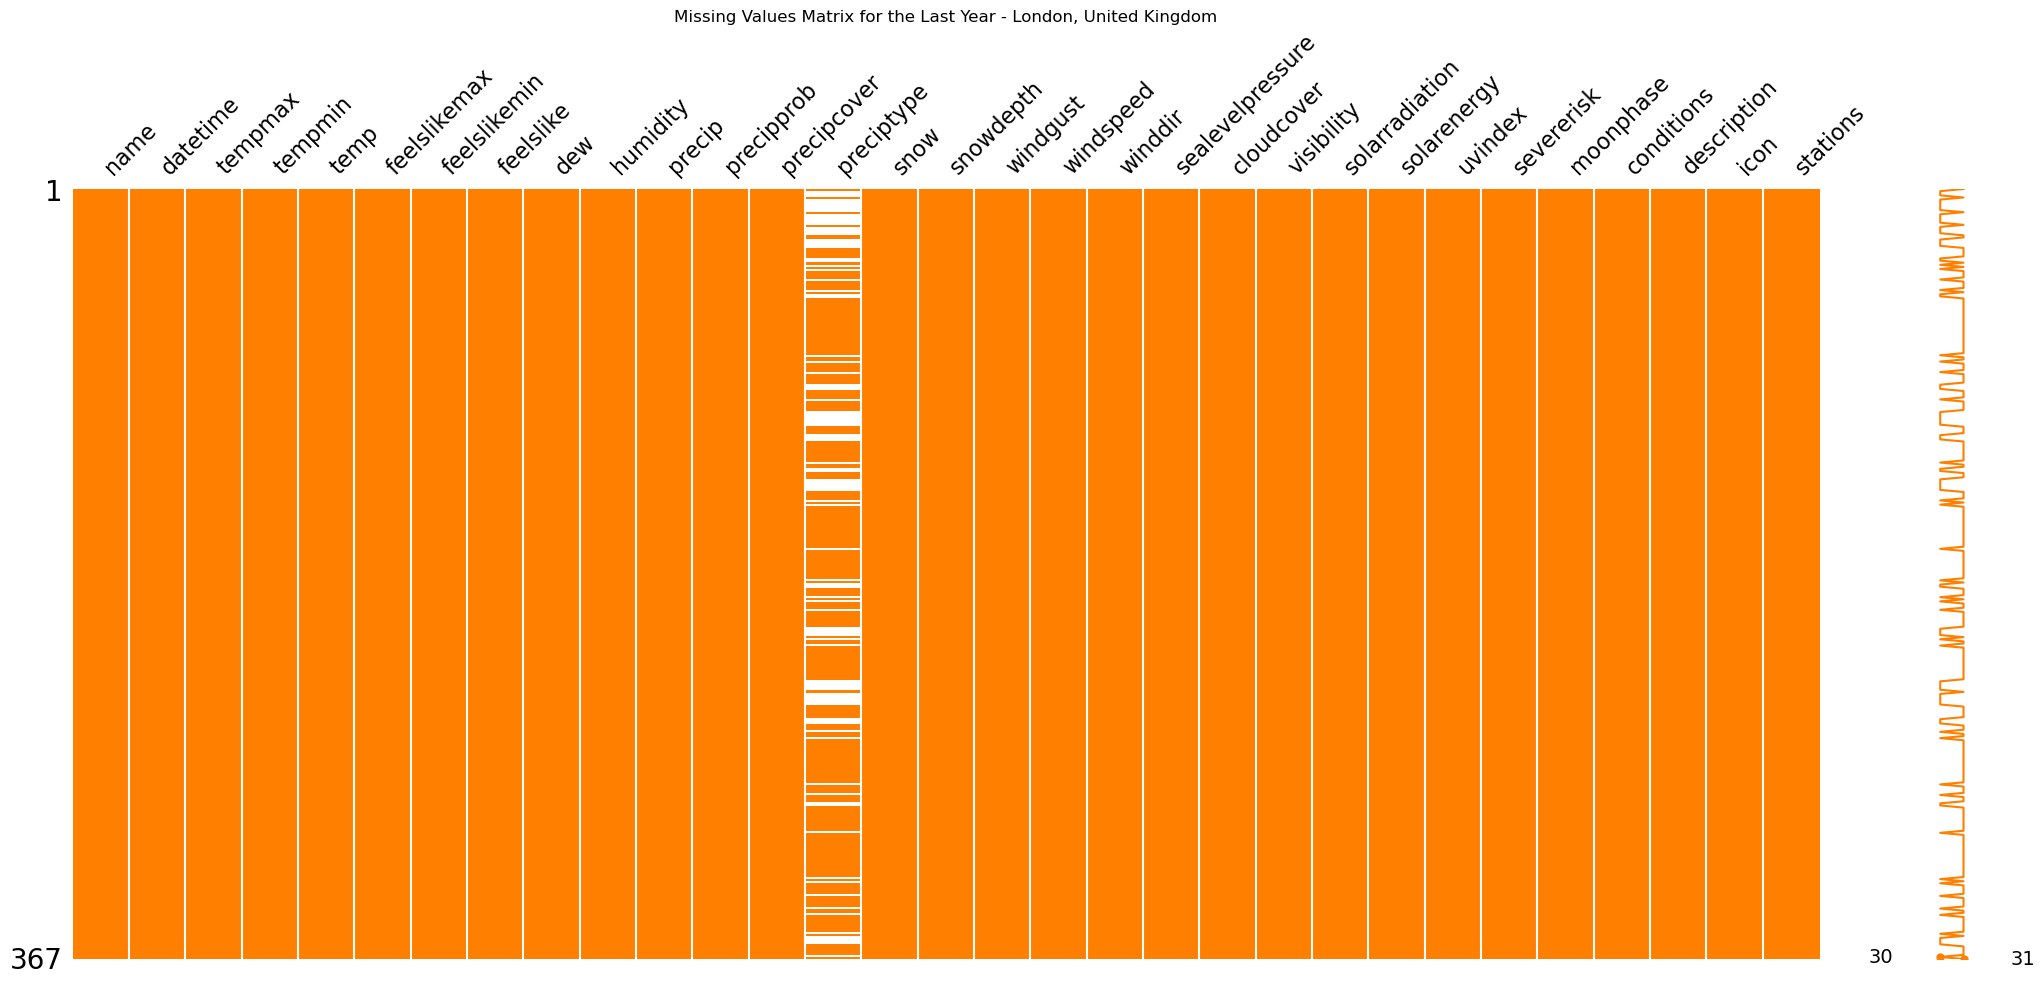

In [26]:
df_london['datetime'] = pd.to_datetime(df_london['datetime'])

last_year = df_london['datetime'].max() - pd.DateOffset(years=1)
df_last_year = df_london[df_london['datetime'] >= last_year]

msno.matrix(df_last_year, color=(1.0, 0.5, 0.0))
plt.title('Missing Values Matrix for the Last Year - London, United Kingdom')
plt.show()

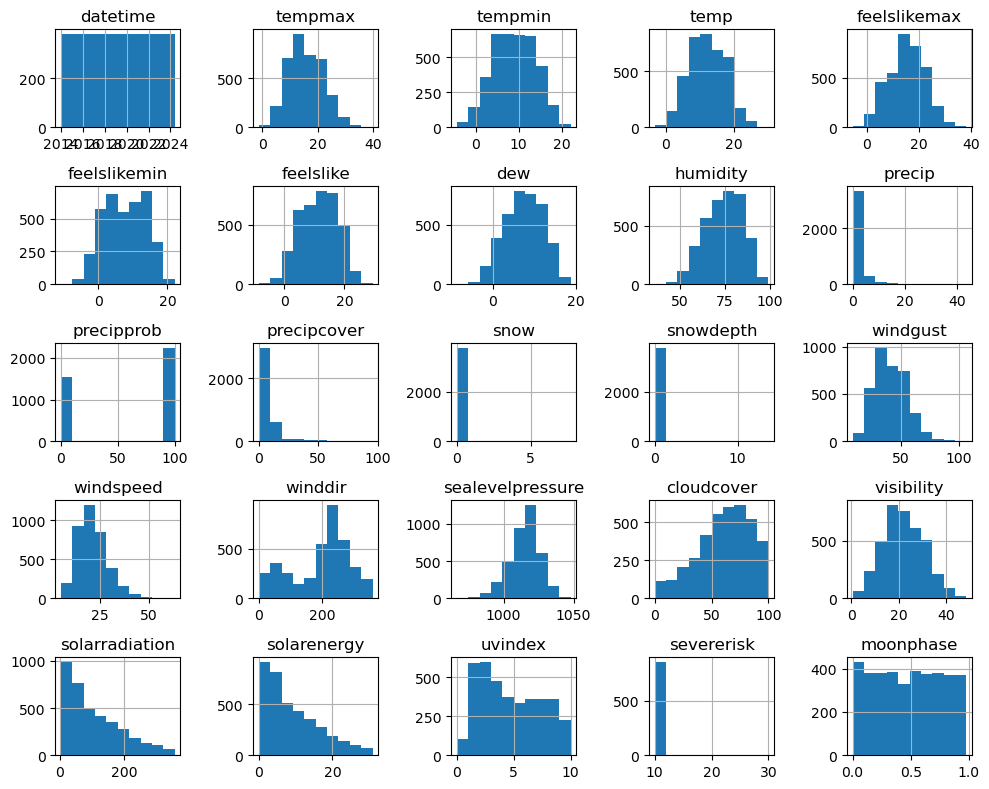

In [27]:
df_london.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

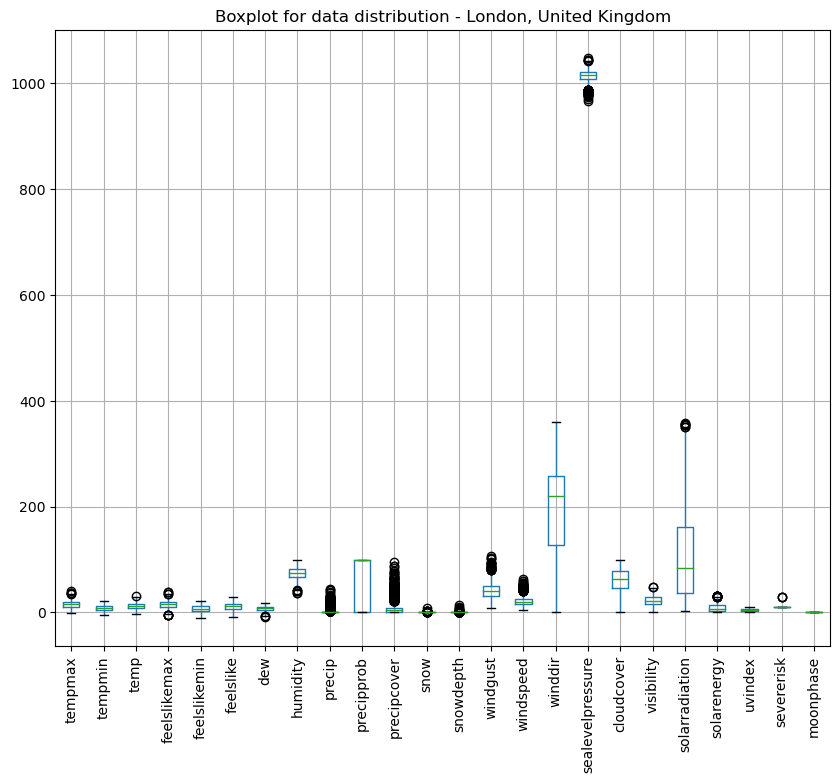

In [28]:
df_london.boxplot(figsize=(10, 8))
plt.xticks(rotation=90)
plt.title('Boxplot for data distribution - London, United Kingdom')
plt.show()

In [29]:
df_london_for_corr = df_london.drop(['name', 'preciptype', 'conditions','description','icon', 'stations'],axis=1)

In [30]:
df_london_for_corr.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
0,2014-01-01,11.6,6.7,9.1,11.6,3.6,7.0,6.7,84.8,11.857,100,16.67,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0,NaN,0.00
1,2014-01-02,11.0,6.6,9.1,11.0,3.6,7.2,6.0,81.0,5.394,100,12.50,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2,NaN,0.03
2,2014-01-03,10.6,7.3,9.0,10.6,3.2,6.5,5.1,76.8,6.030,100,16.67,0.0,0.0,77.4,33.5,218.4,994.5,52.8,17.9,30.3,2.8,2,NaN,0.07
3,2014-01-04,10.1,4.5,8.0,10.1,2.0,5.1,5.2,82.4,5.239,100,16.67,0.0,0.0,62.1,29.2,206.0,993.6,67.6,22.0,17.4,1.4,1,NaN,0.10
4,2014-01-05,12.0,1.8,6.0,12.0,-0.9,3.6,3.9,85.9,0.201,100,8.33,0.0,0.0,55.6,30.4,192.5,1000.0,66.5,25.5,30.4,2.6,2,NaN,0.14


In [31]:
corr_matrix = df_london_for_corr.corr()
print(corr_matrix) 

                   tempmax   tempmin      temp  feelslikemax  feelslikemin  \
tempmax           1.000000  0.880739  0.973772      0.992570      0.892497   
tempmin           0.880739  1.000000  0.956810      0.882454      0.984158   
temp              0.973772  0.956810  1.000000      0.970469      0.957931   
feelslikemax      0.992570  0.882454  0.970469      1.000000      0.897502   
feelslikemin      0.892497  0.984158  0.957931      0.897502      1.000000   
feelslike         0.966945  0.950490  0.992946      0.972603      0.965720   
dew               0.815229  0.919002  0.888771      0.826023      0.920149   
humidity         -0.510786 -0.295188 -0.433604     -0.484854     -0.290831   
precip           -0.079772  0.028707 -0.037742     -0.072548      0.004912   
precipprob       -0.235622 -0.062457 -0.167136     -0.222448     -0.089557   
precipcover      -0.163003 -0.025887 -0.107080     -0.148046     -0.054078   
snow             -0.115714 -0.108447 -0.118596     -0.124238    

C:\Users\nicol\AppData\Local\Temp\ipykernel_37684\1274905262.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_london_for_corr.corr()


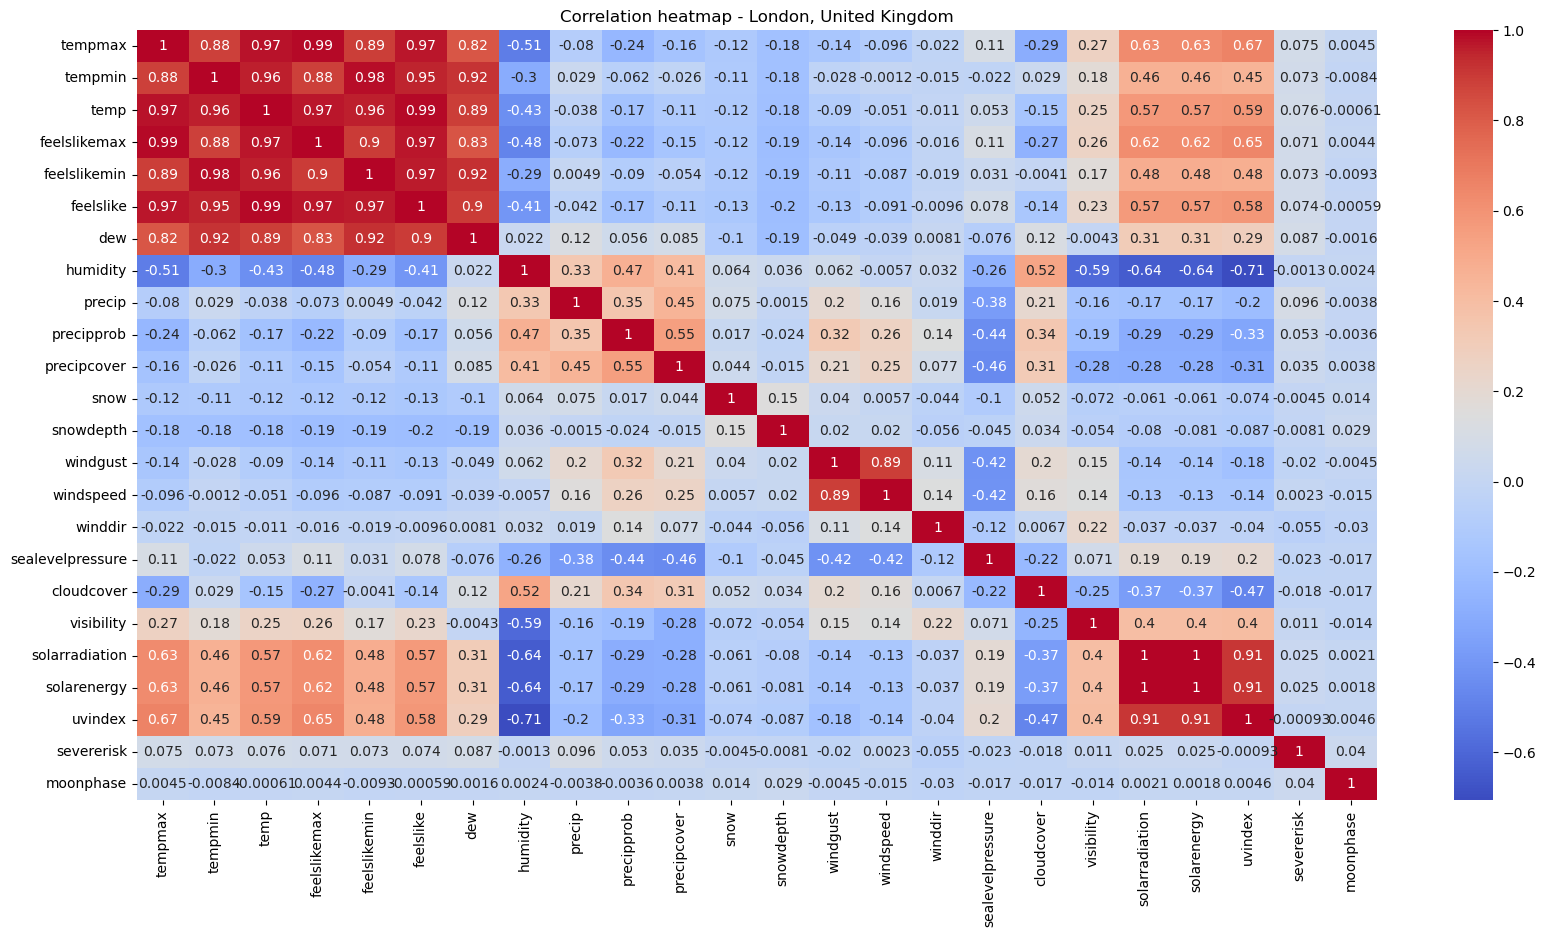

In [32]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap - London, United Kingdom")
plt.show()

look into the correlation that humidity has with temp (-0.43) + solarradiation, solarenergy or uvindex
look into multicolinearity - multiple feature that are roughly the same as the target, which need to be removed (first 5 after the first one)

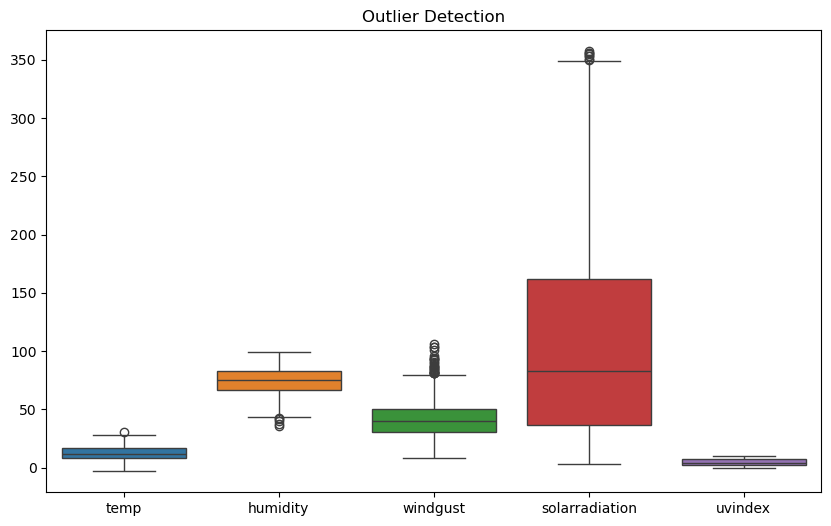

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_london[['temp', 'humidity', 'windgust', 'solarradiation', 'uvindex']])
plt.title("Outlier Detection")
plt.show()

In [34]:
# look into how each of these are measured 
# for example temp is the average at 18 
#first run the models with outliers and then see the results 

In [35]:
df_london.set_index("datetime", inplace = True)
df_london.sort_index(inplace = True)

In [36]:
df_london

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01,"London, England, United Kingdom",11.6,6.7,9.1,11.6,3.6,7.0,6.7,84.8,11.857,100,16.67,rain,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0,NaN,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03769099999,EGWU,03680099999,03768399999,03672..."
2014-01-02,"London, England, United Kingdom",11.0,6.6,9.1,11.0,3.6,7.2,6.0,81.0,5.394,100,12.50,rain,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2,NaN,0.03,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03769099999,03680099999,03672099999,0378109999..."
2014-01-03,"London, England, United Kingdom",10.6,7.3,9.0,10.6,3.2,6.5,5.1,76.8,6.030,100,16.67,rain,0.0,0.0,77.4,33.5,218.4,994.5,52.8,17.9,30.3,2.8,2,NaN,0.07,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03769099999,03680099999,03672099999,0378109999..."
2014-01-04,"London, England, United Kingdom",10.1,4.5,8.0,10.1,2.0,5.1,5.2,82.4,5.239,100,16.67,rain,0.0,0.0,62.1,29.2,206.0,993.6,67.6,22.0,17.4,1.4,1,NaN,0.10,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03769099999,03680099999,03672099999,0378109999..."
2014-01-05,"London, England, United Kingdom",12.0,1.8,6.0,12.0,-0.9,3.6,3.9,85.9,0.201,100,8.33,rain,0.0,0.0,55.6,30.4,192.5,1000.0,66.5,25.5,30.4,2.6,2,NaN,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03769099999,03680099999,03672099999,0378109999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-16,"London, England, United Kingdom",16.5,12.3,14.2,16.5,12.3,14.2,12.4,89.1,10.126,100,20.83,rain,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3,10.0,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03769099999,03680099999,D5621,03781099999,0367..."
2024-05-17,"London, England, United Kingdom",21.6,10.0,16.4,21.6,10.0,16.4,10.3,70.2,0.000,0,0.00,rain,0.0,0.0,17.4,9.4,194.8,1009.3,41.4,21.7,177.8,15.5,10,10.0,0.30,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03769099999,EGWU,03680099999,D5621,03781099999..."
2024-05-18,"London, England, United Kingdom",19.2,13.0,15.8,19.2,13.0,15.8,11.7,77.5,2.000,100,25.00,rain,0.0,0.0,22.7,13.4,5.8,1012.8,83.7,9.7,76.1,6.7,3,10.0,0.33,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"EGWU,D5621,EGLC"


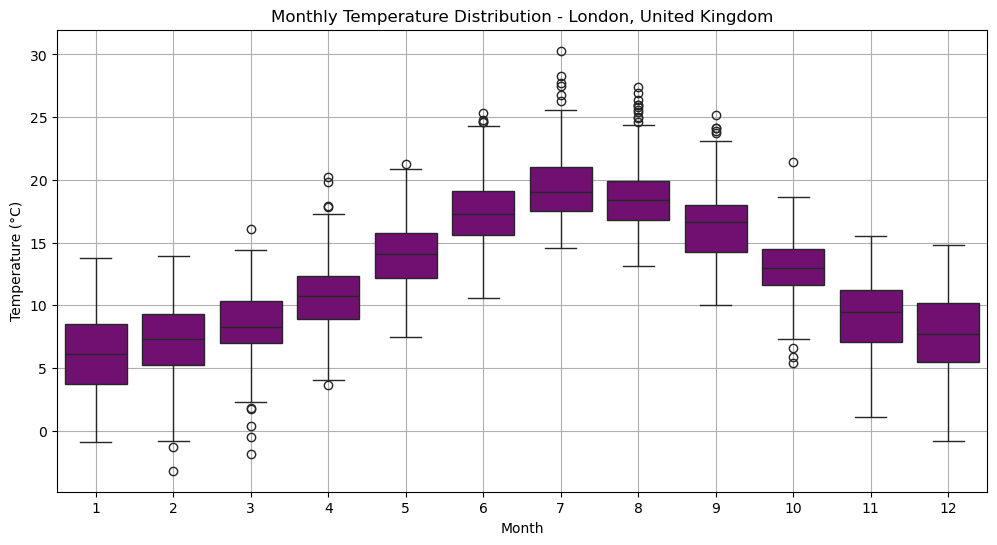

In [37]:
df_london['month'] = df_london.index.month

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='temp', data=df_london, color="purple")
plt.title('Monthly Temperature Distribution - London, United Kingdom')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

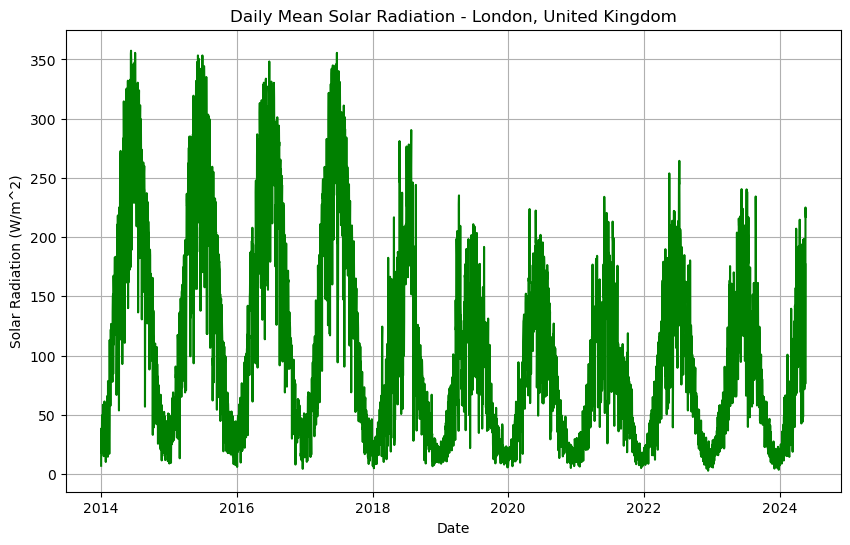

In [38]:
daily_solar_radiation = df_london['solarradiation'].resample('D').mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_solar_radiation.index, daily_solar_radiation.values, linestyle='-', color='green')
plt.title('Daily Mean Solar Radiation - London, United Kingdom')
plt.xlabel('Date')
plt.ylabel('Solar Radiation (W/m^2)')
plt.grid(True)
plt.show()

## Missing values

In [39]:
df_london.isna().sum()

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1426
snow                   0
snowdepth              0
windgust             175
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
moonphase              0
conditions             0
description            0
icon                   0
stations               0
month                  0
dtype: int64

In [40]:
#run k-nn to fill in the missing values with the k nearest neighbour 
#https://www.sciencedirect.com/science/article/abs/pii/S0164121212001586#:~:text=kNN%20imputation%20is%20designed%20to,or%20attribute)%20is%20categorical%2C%20referred

imputer = KNNImputer(n_neighbors=5)
df_london[['windgust', 'severerisk']] = imputer.fit_transform(df_london[['windgust', 'severerisk']])

In [41]:
df_london['preciptype'].unique()

array(['rain', nan, 'rain,snow', 'snow'], dtype=object)

In [42]:
df_london['preciptype'].value_counts()

rain         2320
rain,snow      40
snow            7
Name: preciptype, dtype: int64

In [43]:
df_london.isna().sum()

name                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1426
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
month                  0
dtype: int64

In [44]:
#filling in missing values from precipitation because if they are missing, it means there was no registration of precipitation that day
df_london['preciptype'] = df_london['preciptype'].fillna(0)

In [45]:
df_london.isna().sum()

name                0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
moonphase           0
conditions          0
description         0
icon                0
stations            0
month               0
dtype: int64

## Droppping unnecessary columns

In [46]:
# based on the heatmap, it seems that columns like tempmax, tempin, feelslikemax, feelslikemin and feelslike are too similar with the target variable and they are being dropped as to not create any data leakage in the models to follow

In [47]:
# reference multi colinearity

In [48]:
columns_to_drop = ['tempmax', 'tempmin', 'icon', 'stations', 'conditions', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike', 'preciptype', 'name']
df_london = df_london.drop(columns=columns_to_drop)

## Tokenization of the "description" column

In [49]:
# step 1: text processing
tokenizer = CountVectorizer()
hashingTF = TfidfTransformer(use_idf=False)
idf = TfidfTransformer(use_idf=True)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

In [50]:
# pipeline that processes text and then clusters
pipeline = Pipeline(steps=[
    ('tokenizer', tokenizer),
    ('hashingTF', hashingTF),
    ('idf', idf),
    ('kmeans', kmeans)
])

In [51]:
# fitting the model on the "description"column
text_features = pipeline.fit_transform(df_london['description'])

C:\Users\nicol\anaconda3\envs\AI2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
kmeans.labels_
df_london['clusters_description'] = kmeans.labels_

In [53]:
df_london['clusters_description'].value_counts()

0    2309
1    1244
2     240
Name: clusters_description, dtype: int64

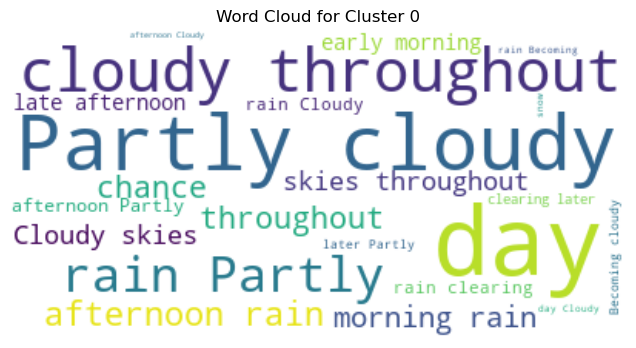

In [54]:
text = ' '.join(description for description in df_london[df_london['clusters_description']==0]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 0')
plt.show()

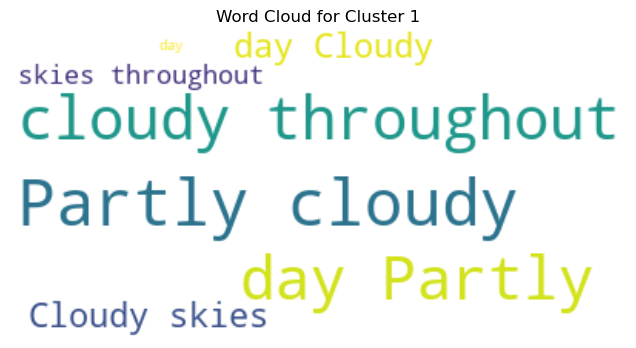

In [55]:
text = ' '.join(description for description in df_london[df_london['clusters_description']==1]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 1')
plt.show()

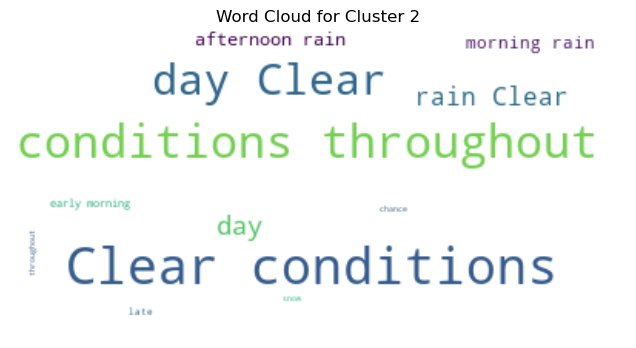

In [56]:
text = ' '.join(description for description in df_london[df_london['clusters_description']==2]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 2')
plt.show()

In [57]:
df_london = df_london.drop(columns=['description'])
df_london.head(2)

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,month,clusters_description
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01,9.1,6.7,84.8,11.857,100,16.67,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0,10.0,0.00,1,0
2014-01-02,9.1,6.0,81.0,5.394,100,12.50,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2,10.0,0.03,1,0


## Feature engineering

In [58]:
df_london

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,month,clusters_description
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01,9.1,6.7,84.8,11.857,100,16.67,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0,10.0,0.00,1,0
2014-01-02,9.1,6.0,81.0,5.394,100,12.50,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2,10.0,0.03,1,0
2014-01-03,9.0,5.1,76.8,6.030,100,16.67,0.0,0.0,77.4,33.5,218.4,994.5,52.8,17.9,30.3,2.8,2,10.0,0.07,1,0
2014-01-04,8.0,5.2,82.4,5.239,100,16.67,0.0,0.0,62.1,29.2,206.0,993.6,67.6,22.0,17.4,1.4,1,10.0,0.10,1,0
2014-01-05,6.0,3.9,85.9,0.201,100,8.33,0.0,0.0,55.6,30.4,192.5,1000.0,66.5,25.5,30.4,2.6,2,10.0,0.14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-16,14.2,12.4,89.1,10.126,100,20.83,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3,10.0,0.27,5,0
2024-05-17,16.4,10.3,70.2,0.000,0,0.00,0.0,0.0,17.4,9.4,194.8,1009.3,41.4,21.7,177.8,15.5,10,10.0,0.30,5,1
2024-05-18,15.8,11.7,77.5,2.000,100,25.00,0.0,0.0,22.7,13.4,5.8,1012.8,83.7,9.7,76.1,6.7,3,10.0,0.33,5,0


In [59]:
# xgboost baseline with all features 
# xgboost with feature selection 
# sktime just for temperature prediction with no features
# sktime lagged features 

## Xgboost baseline with all features 
### Lagged features

In [60]:
#shifting the features by 3 days

In [61]:
# this shifts all features by three days except the temp, and then it merges them back togther
df_london_shifted = df_london.drop('temp', axis=1).shift(3)

In [62]:
df_london_eng = pd.concat([df_london['temp'], df_london_shifted], axis=1)

In [63]:
df_london_eng

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,month,clusters_description
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-04,8.0,6.7,84.8,11.857,100.0,16.67,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0.0,10.0,0.00,1.0,0.0
2014-01-05,6.0,6.0,81.0,5.394,100.0,12.50,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2.0,10.0,0.03,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-16,14.2,11.0,73.4,0.000,0.0,0.00,0.0,0.0,35.2,21.0,183.4,1007.1,86.1,14.9,71.5,6.2,2.0,10.0,0.17,5.0,1.0
2024-05-17,16.4,11.7,77.8,3.598,100.0,33.33,0.0,0.0,30.5,21.0,149.7,1001.1,85.6,15.4,76.1,6.5,4.0,10.0,0.20,5.0,0.0
2024-05-18,15.8,10.5,69.7,0.797,100.0,8.33,0.0,0.0,25.0,15.2,147.1,1004.2,52.3,19.4,118.8,10.3,9.0,10.0,0.25,5.0,0.0


In [64]:
df_london_shifted

,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,month,clusters_description
datetime,,,,,,,,,,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-04,6.7,84.8,11.857,100.0,16.67,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0.0,10.0,0.00,1.0,0.0
2014-01-05,6.0,81.0,5.394,100.0,12.50,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2.0,10.0,0.03,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-16,11.0,73.4,0.000,0.0,0.00,0.0,0.0,35.2,21.0,183.4,1007.1,86.1,14.9,71.5,6.2,2.0,10.0,0.17,5.0,1.0
2024-05-17,11.7,77.8,3.598,100.0,33.33,0.0,0.0,30.5,21.0,149.7,1001.1,85.6,15.4,76.1,6.5,4.0,10.0,0.20,5.0,0.0
2024-05-18,10.5,69.7,0.797,100.0,8.33,0.0,0.0,25.0,15.2,147.1,1004.2,52.3,19.4,118.8,10.3,9.0,10.0,0.25,5.0,0.0


In [65]:
# adding back the last three rows, which have all the shifted features but without the temp for them as that is what we predict
last_three = df_london_shifted.tail(3)
last_three.set_index( pd.date_range(start=max(df_london.index)+pd.Timedelta(days=1), periods=3, freq='D'))


,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,month,clusters_description
2024-05-21,10.5,69.7,0.797,100.0,8.33,0.0,0.0,25.0,15.2,147.1,1004.2,52.3,19.4,118.8,10.3,9.0,10.0,0.25,5.0,0.0
2024-05-22,12.4,89.1,10.126,100.0,20.83,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3.0,10.0,0.27,5.0,0.0
2024-05-23,10.3,70.2,0.000,0.0,0.00,0.0,0.0,17.4,9.4,194.8,1009.3,41.4,21.7,177.8,15.5,10.0,10.0,0.30,5.0,1.0


In [66]:
max(df_london.index)+pd.Timedelta(days=1)

Timestamp('2024-05-21 00:00:00')

In [67]:
df_london_final = pd.concat([df_london_eng, last_three], ignore_index=True)

In [68]:
df_london_final = df_london_final.set_index(pd.date_range(start=min(df_london.index), periods=len(df_london)+3, freq='D'))

In [69]:
df_london_final.tail()

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,month,clusters_description
2024-05-19,16.6,12.4,89.1,10.126,100.0,20.83,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3.0,10.0,0.27,5.0,0.0
2024-05-20,15.1,10.3,70.2,0.000,0.0,0.00,0.0,0.0,17.4,9.4,194.8,1009.3,41.4,21.7,177.8,15.5,10.0,10.0,0.30,5.0,1.0
2024-05-21,NaN,10.5,69.7,0.797,100.0,8.33,0.0,0.0,25.0,15.2,147.1,1004.2,52.3,19.4,118.8,10.3,9.0,10.0,0.25,5.0,0.0
2024-05-22,NaN,12.4,89.1,10.126,100.0,20.83,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3.0,10.0,0.27,5.0,0.0
2024-05-23,NaN,10.3,70.2,0.000,0.0,0.00,0.0,0.0,17.4,9.4,194.8,1009.3,41.4,21.7,177.8,15.5,10.0,10.0,0.30,5.0,1.0


In [70]:
# we've created three new dates with all the lagged features aside from temp, which will be predicted in the next section

## train and test split based on the date as it's a time series

In [71]:
# because XGBoost is not a time series model (address it as a limitation), i will split the datetime column into days, months and year, so the model can learn which temperature is related to the May month and which temperature is related to the December month, as it learns accross multiple years

In [72]:
df_london_final['month'] = df_london_final.index.month
df_london_final['year'] = df_london_final.index.year

In [73]:
df_dummies = pd.get_dummies(df_london_final['month'], prefix='month')

In [74]:
df_london_final = pd.concat([df_london_final, df_dummies], axis=1)
df_london_final.drop(columns=['month'], inplace=True)

In [75]:
df_london_final

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2014-01-01,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-02,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-03,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-04,8.0,6.7,84.8,11.857,100.0,16.67,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0.0,10.0,0.00,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-05,6.0,6.0,81.0,5.394,100.0,12.50,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2.0,10.0,0.03,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-19,16.6,12.4,89.1,10.126,100.0,20.83,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3.0,10.0,0.27,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0
2024-05-20,15.1,10.3,70.2,0.000,0.0,0.00,0.0,0.0,17.4,9.4,194.8,1009.3,41.4,21.7,177.8,15.5,10.0,10.0,0.30,1.0,2024,0,0,0,0,1,0,0,0,0,0,0,0
2024-05-21,NaN,10.5,69.7,0.797,100.0,8.33,0.0,0.0,25.0,15.2,147.1,1004.2,52.3,19.4,118.8,10.3,9.0,10.0,0.25,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0
2024-05-22,NaN,12.4,89.1,10.126,100.0,20.83,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3.0,10.0,0.27,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0


In [76]:
df_train = df_london_final.iloc[:-368] #training set - takes the last 368 days
df_test = df_london_final.iloc[-368:-3] #test set - takes the last 368 - the last 3 days for preds
df_future =  df_london_final.iloc[-3:] #future dataframe that contains the predictions that we will generate but right now jas just the features

In [77]:
df_train.tail()

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2023-05-17,13.7,8.1,69.3,0.000,0.0,0.00,0.0,0.0,21.5,16.0,307.8,1020.7,65.4,18.3,152.2,13.2,8.0,10.0,0.81,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-18,14.6,5.8,60.6,2.989,100.0,20.83,0.0,0.0,41.3,22.9,353.1,1019.9,57.3,38.2,134.8,11.6,5.0,10.0,0.85,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-19,13.7,5.0,59.5,0.000,0.0,0.00,0.0,0.0,34.2,18.1,329.3,1024.9,25.6,27.6,203.8,17.7,9.0,10.0,0.88,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-20,14.3,7.4,66.7,0.000,0.0,0.00,0.0,0.0,20.5,17.7,16.7,1028.2,38.6,23.2,147.4,12.7,7.0,10.0,0.92,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-21,14.4,7.1,61.6,0.000,0.0,0.00,0.0,0.0,24.1,16.0,92.8,1028.0,52.3,26.6,161.9,13.9,7.0,10.0,0.96,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0


In [78]:
df_test.head()

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2023-05-22,15.1,6.9,64.3,0.0,0.0,0.0,0.0,0.0,26.1,17.5,61.3,1027.2,55.6,27.2,99.0,8.7,4.0,10.0,0.00,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-23,14.0,6.1,60.6,0.0,0.0,0.0,0.0,0.0,36.4,21.3,40.6,1025.3,40.0,27.5,192.2,16.3,9.0,10.0,0.03,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-24,15.8,6.7,61.2,0.0,0.0,0.0,0.0,0.0,34.7,20.0,30.7,1021.7,43.9,35.0,156.4,13.6,7.0,10.0,0.06,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-25,15.0,6.7,57.9,0.0,0.0,0.0,0.0,0.0,41.5,23.9,12.1,1021.2,62.5,37.2,80.0,7.0,3.0,10.0,0.09,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-26,14.2,6.9,63.5,0.0,0.0,0.0,0.0,0.0,26.1,17.3,36.0,1026.5,27.0,29.2,147.4,12.5,7.0,10.0,0.12,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0


In [79]:
df_test.tail()

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2024-05-16,14.2,11.0,73.4,0.000,0.0,0.00,0.0,0.0,35.2,21.0,183.4,1007.1,86.1,14.9,71.5,6.2,2.0,10.0,0.17,1.0,2024,0,0,0,0,1,0,0,0,0,0,0,0
2024-05-17,16.4,11.7,77.8,3.598,100.0,33.33,0.0,0.0,30.5,21.0,149.7,1001.1,85.6,15.4,76.1,6.5,4.0,10.0,0.20,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0
2024-05-18,15.8,10.5,69.7,0.797,100.0,8.33,0.0,0.0,25.0,15.2,147.1,1004.2,52.3,19.4,118.8,10.3,9.0,10.0,0.25,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0
2024-05-19,16.6,12.4,89.1,10.126,100.0,20.83,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3.0,10.0,0.27,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0
2024-05-20,15.1,10.3,70.2,0.000,0.0,0.00,0.0,0.0,17.4,9.4,194.8,1009.3,41.4,21.7,177.8,15.5,10.0,10.0,0.30,1.0,2024,0,0,0,0,1,0,0,0,0,0,0,0


In [80]:
df_future

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2024-05-21,NaN,10.5,69.7,0.797,100.0,8.33,0.0,0.0,25.0,15.2,147.1,1004.2,52.3,19.4,118.8,10.3,9.0,10.0,0.25,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0
2024-05-22,NaN,12.4,89.1,10.126,100.0,20.83,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3.0,10.0,0.27,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0
2024-05-23,NaN,10.3,70.2,0.000,0.0,0.00,0.0,0.0,17.4,9.4,194.8,1009.3,41.4,21.7,177.8,15.5,10.0,10.0,0.30,1.0,2024,0,0,0,0,1,0,0,0,0,0,0,0


In [81]:
df_train.head()
df_train.dropna(inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_37684\158935078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.dropna(inplace=True)


In [82]:
df_train

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2014-01-04,8.0,6.7,84.8,11.857,100.0,16.67,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0.0,10.0,0.00,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-05,6.0,6.0,81.0,5.394,100.0,12.50,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2.0,10.0,0.03,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-06,11.6,5.1,76.8,6.030,100.0,16.67,0.0,0.0,77.4,33.5,218.4,994.5,52.8,17.9,30.3,2.8,2.0,10.0,0.07,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-07,10.7,5.2,82.4,5.239,100.0,16.67,0.0,0.0,62.1,29.2,206.0,993.6,67.6,22.0,17.4,1.4,1.0,10.0,0.10,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-08,9.6,3.9,85.9,0.201,100.0,8.33,0.0,0.0,55.6,30.4,192.5,1000.0,66.5,25.5,30.4,2.6,2.0,10.0,0.14,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-17,13.7,8.1,69.3,0.000,0.0,0.00,0.0,0.0,21.5,16.0,307.8,1020.7,65.4,18.3,152.2,13.2,8.0,10.0,0.81,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-18,14.6,5.8,60.6,2.989,100.0,20.83,0.0,0.0,41.3,22.9,353.1,1019.9,57.3,38.2,134.8,11.6,5.0,10.0,0.85,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-19,13.7,5.0,59.5,0.000,0.0,0.00,0.0,0.0,34.2,18.1,329.3,1024.9,25.6,27.6,203.8,17.7,9.0,10.0,0.88,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-20,14.3,7.4,66.7,0.000,0.0,0.00,0.0,0.0,20.5,17.7,16.7,1028.2,38.6,23.2,147.4,12.7,7.0,10.0,0.92,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0


In [83]:
df_test

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2023-05-22,15.1,6.9,64.3,0.000,0.0,0.00,0.0,0.0,26.1,17.5,61.3,1027.2,55.6,27.2,99.0,8.7,4.0,10.0,0.00,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-23,14.0,6.1,60.6,0.000,0.0,0.00,0.0,0.0,36.4,21.3,40.6,1025.3,40.0,27.5,192.2,16.3,9.0,10.0,0.03,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-24,15.8,6.7,61.2,0.000,0.0,0.00,0.0,0.0,34.7,20.0,30.7,1021.7,43.9,35.0,156.4,13.6,7.0,10.0,0.06,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-25,15.0,6.7,57.9,0.000,0.0,0.00,0.0,0.0,41.5,23.9,12.1,1021.2,62.5,37.2,80.0,7.0,3.0,10.0,0.09,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-26,14.2,6.9,63.5,0.000,0.0,0.00,0.0,0.0,26.1,17.3,36.0,1026.5,27.0,29.2,147.4,12.5,7.0,10.0,0.12,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-16,14.2,11.0,73.4,0.000,0.0,0.00,0.0,0.0,35.2,21.0,183.4,1007.1,86.1,14.9,71.5,6.2,2.0,10.0,0.17,1.0,2024,0,0,0,0,1,0,0,0,0,0,0,0
2024-05-17,16.4,11.7,77.8,3.598,100.0,33.33,0.0,0.0,30.5,21.0,149.7,1001.1,85.6,15.4,76.1,6.5,4.0,10.0,0.20,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0
2024-05-18,15.8,10.5,69.7,0.797,100.0,8.33,0.0,0.0,25.0,15.2,147.1,1004.2,52.3,19.4,118.8,10.3,9.0,10.0,0.25,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0
2024-05-19,16.6,12.4,89.1,10.126,100.0,20.83,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3.0,10.0,0.27,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0


In [84]:
# apply regressor 
# create the predictions 
# look R2 and other performance metrics, add in MAE

In [85]:
df_train

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2014-01-04,8.0,6.7,84.8,11.857,100.0,16.67,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0.0,10.0,0.00,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-05,6.0,6.0,81.0,5.394,100.0,12.50,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2.0,10.0,0.03,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-06,11.6,5.1,76.8,6.030,100.0,16.67,0.0,0.0,77.4,33.5,218.4,994.5,52.8,17.9,30.3,2.8,2.0,10.0,0.07,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-07,10.7,5.2,82.4,5.239,100.0,16.67,0.0,0.0,62.1,29.2,206.0,993.6,67.6,22.0,17.4,1.4,1.0,10.0,0.10,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-08,9.6,3.9,85.9,0.201,100.0,8.33,0.0,0.0,55.6,30.4,192.5,1000.0,66.5,25.5,30.4,2.6,2.0,10.0,0.14,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-17,13.7,8.1,69.3,0.000,0.0,0.00,0.0,0.0,21.5,16.0,307.8,1020.7,65.4,18.3,152.2,13.2,8.0,10.0,0.81,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-18,14.6,5.8,60.6,2.989,100.0,20.83,0.0,0.0,41.3,22.9,353.1,1019.9,57.3,38.2,134.8,11.6,5.0,10.0,0.85,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-19,13.7,5.0,59.5,0.000,0.0,0.00,0.0,0.0,34.2,18.1,329.3,1024.9,25.6,27.6,203.8,17.7,9.0,10.0,0.88,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-20,14.3,7.4,66.7,0.000,0.0,0.00,0.0,0.0,20.5,17.7,16.7,1028.2,38.6,23.2,147.4,12.7,7.0,10.0,0.92,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0


In [86]:
model_baseline = XGBRegressor()
model_baseline.fit(df_train.drop('temp',axis=1), df_train[['temp']])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
y_pred_base_xg = model_baseline.predict(df_test.drop('temp',axis=1))

In [88]:
y_pred_base_xg

array([14.492051 , 17.870735 , 16.441523 , 14.017682 , 13.3807955,
       18.364727 , 13.875509 , 16.55626  , 13.40738  , 17.022013 ,
       13.096956 , 15.220464 , 18.718847 , 16.462023 , 17.883986 ,
       18.190876 , 18.983713 , 15.292368 , 13.434772 , 16.804014 ,
       17.765388 , 17.663021 , 17.780577 , 18.162876 , 19.35969  ,
       16.947762 , 18.929035 , 15.666152 , 18.354177 , 16.387234 ,
       18.575077 , 16.272154 , 17.615025 , 20.331121 , 17.903595 ,
       20.021744 , 19.140293 , 18.134293 , 19.111702 , 21.45441  ,
       19.583147 , 20.168015 , 18.224314 , 18.75007  , 18.87896  ,
       17.913774 , 16.178864 , 18.172672 , 20.501274 , 21.236399 ,
       20.726442 , 20.156572 , 17.11704  , 16.378408 , 17.71087  ,
       18.798628 , 16.771502 , 17.329672 , 16.65339  , 17.572655 ,
       19.383886 , 20.404385 , 20.10089  , 18.238998 , 17.524273 ,
       17.880363 , 16.556747 , 16.61994  , 17.54138  , 18.602844 ,
       16.800179 , 17.26145  , 17.58127  , 16.794807 , 18.3065

In [89]:
has_na = np.isnan(y_pred_base_xg).any()
print({has_na})

{False}


In [90]:
na_count = np.isnan(y_pred_base_xg).sum()
print({na_count})

{0}


In [91]:
df_test.isna()

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2023-05-22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2023-05-23,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2023-05-24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2023-05-25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2023-05-26,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-16,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2024-05-17,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2024-05-18,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2024-05-19,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [92]:
#performance metrics
#df_test has na 

In [93]:
mae = mean_absolute_error(df_test['temp'], y_pred_base_xg)
mse = mean_squared_error(df_test['temp'], y_pred_base_xg)
rmse = mse ** 0.5
r2 = r2_score(df_test['temp'], y_pred_base_xg)

print(f"Mean Absolute Error (MAE) for XGBoost baseline with all regressors: {mae}")
print(f"Mean Squared Error (MSE) for XGBoost baseline with all regressors: {mse}")
print(f"Root Mean Squared Error (RMSE) for XGBoost baseline with all regressors: {rmse}")
print(f"R-squared (R2) for XGBoost baseline with all regressors: {r2}")

Mean Absolute Error (MAE) for XGBoost baseline with all regressors: 2.3868065674664227
Mean Squared Error (MSE) for XGBoost baseline with all regressors: 8.827414221743139
Root Mean Squared Error (RMSE) for XGBoost baseline with all regressors: 2.971096467929498
R-squared (R2) for XGBoost baseline with all regressors: 0.6797312280993014


In [94]:
# for RMSE: if my prediction is errored I want that to inflate the error - but don't know in which direction
# MAE: it means it's 2.3 degrees away from truth just don't know in which direction 

## Predictions vs Actuals

In [95]:
df_test[['temp']]

,temp
2023-05-22,15.1
2023-05-23,14.0
2023-05-24,15.8
2023-05-25,15.0
2023-05-26,14.2
...,...
2024-05-16,14.2
2024-05-17,16.4
2024-05-18,15.8
2024-05-19,16.6


In [96]:
df_test_w_preds = df_test.copy()

In [97]:
#create new column in order to attach index date to the preds
df_test_w_preds['preds'] = y_pred_base_xg

In [98]:
def plot_forecast(actuals, predictions): 
    plt.figure(figsize=(15, 10))
    plt.plot(actuals, label='Actuals', marker='o')
    plt.plot(predictions, label='Preds', marker='s')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.title('Predicted vs Actual temperature for XGBoost baseline model with all features')
    plt.show()

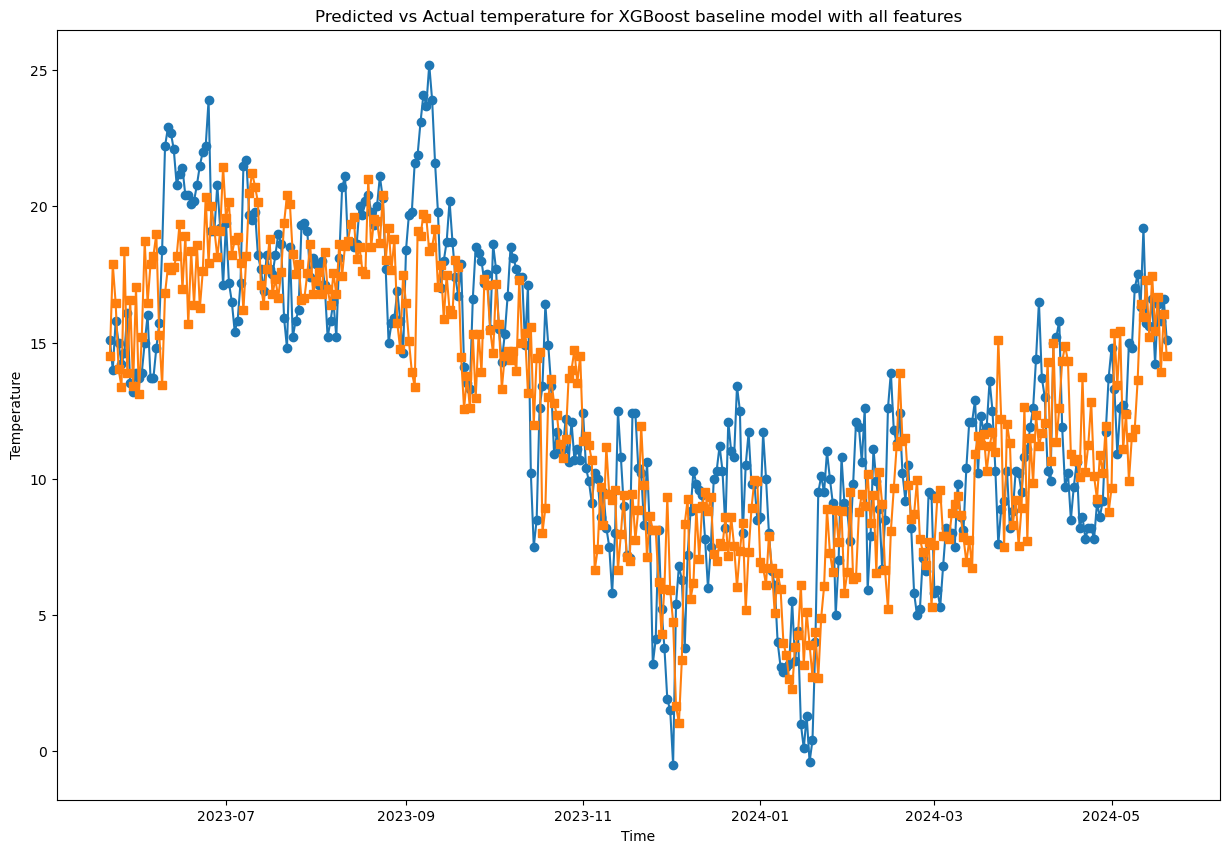

In [99]:
plot_forecast(df_test_w_preds[['temp']], df_test_w_preds[['preds']])

## Feature importance

In [100]:
from xgboost import plot_importance

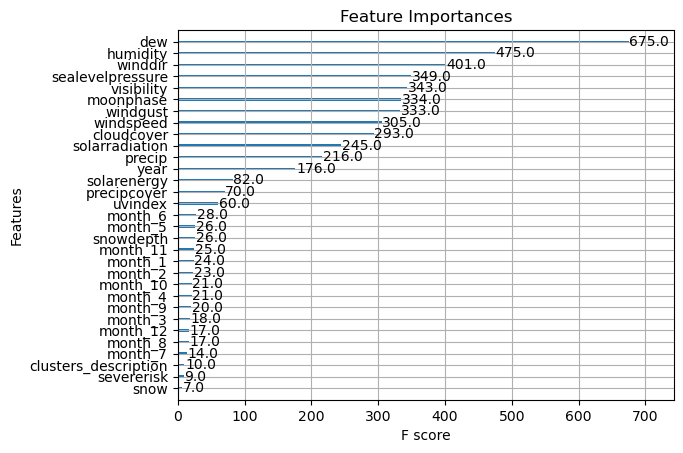

In [101]:
plot_importance(model_baseline)
plt.title('Feature Importances')
plt.show()

In [102]:
# look into dew and the importance of it in terms of climate change and weather prediction 
# the year has quite an important impact as it shows that the average temp is changing every year and therefore has an impact on all predictions
# it proves the temperature changes every year, and it is not cyclical 
# try removing all below 30 

In [103]:
future_preds = model_baseline.predict(df_future.drop('temp', axis=1))

In [104]:
df_future['preds'] = future_preds

C:\Users\nicol\AppData\Local\Temp\ipykernel_37684\2036312194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['preds'] = future_preds


In [105]:
df_future

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,preds
2024-05-21,NaN,10.5,69.7,0.797,100.0,8.33,0.0,0.0,25.0,15.2,147.1,1004.2,52.3,19.4,118.8,10.3,9.0,10.0,0.25,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0,13.906611
2024-05-22,NaN,12.4,89.1,10.126,100.0,20.83,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3.0,10.0,0.27,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0,16.043221
2024-05-23,NaN,10.3,70.2,0.000,0.0,0.00,0.0,0.0,17.4,9.4,194.8,1009.3,41.4,21.7,177.8,15.5,10.0,10.0,0.30,1.0,2024,0,0,0,0,1,0,0,0,0,0,0,0,14.519270


## Grid search model hyperparameter tuning XGBOOST 

In [106]:
df_train

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2014-01-04,8.0,6.7,84.8,11.857,100.0,16.67,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0.0,10.0,0.00,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-05,6.0,6.0,81.0,5.394,100.0,12.50,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2.0,10.0,0.03,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-06,11.6,5.1,76.8,6.030,100.0,16.67,0.0,0.0,77.4,33.5,218.4,994.5,52.8,17.9,30.3,2.8,2.0,10.0,0.07,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-07,10.7,5.2,82.4,5.239,100.0,16.67,0.0,0.0,62.1,29.2,206.0,993.6,67.6,22.0,17.4,1.4,1.0,10.0,0.10,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-08,9.6,3.9,85.9,0.201,100.0,8.33,0.0,0.0,55.6,30.4,192.5,1000.0,66.5,25.5,30.4,2.6,2.0,10.0,0.14,0.0,2014,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-17,13.7,8.1,69.3,0.000,0.0,0.00,0.0,0.0,21.5,16.0,307.8,1020.7,65.4,18.3,152.2,13.2,8.0,10.0,0.81,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-18,14.6,5.8,60.6,2.989,100.0,20.83,0.0,0.0,41.3,22.9,353.1,1019.9,57.3,38.2,134.8,11.6,5.0,10.0,0.85,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-19,13.7,5.0,59.5,0.000,0.0,0.00,0.0,0.0,34.2,18.1,329.3,1024.9,25.6,27.6,203.8,17.7,9.0,10.0,0.88,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0
2023-05-20,14.3,7.4,66.7,0.000,0.0,0.00,0.0,0.0,20.5,17.7,16.7,1028.2,38.6,23.2,147.4,12.7,7.0,10.0,0.92,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0


In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'max_leaf_nodes':  [0, 10, 20], 
    'reg_lambda': [0, 0.1, 1]
}

grid_search = GridSearchCV(estimator=model_baseline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [109]:
grid_search.fit(df_train.drop('temp', axis=1), df_train['temp']) #first one is train without target, second one is just target

best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\nicol\anaconda3\envs\AI2023\lib\site-packages\xgboost\core.py:160: UserWarning: [19:29:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


In [110]:
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 0, 'reg_lambda': 1, 'subsample': 0.7}
Best score: -7.226425704507559


In [111]:
gs_model = XGBRegressor(learning_rate= 0.1, max_depth= 3, subsample= 0.7, max_leaf_nodes=0, reg_lambda=1)
gs_model.fit(df_train.drop('temp',axis=1), df_train[['temp']])

C:\Users\nicol\anaconda3\envs\AI2023\lib\site-packages\xgboost\core.py:160: UserWarning: [19:29:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaf_nodes=0,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [112]:
pred_gs_model = gs_model.predict(df_test.drop('temp',axis=1))

## Performance metrics for gs model xgsboot

In [113]:
mae = mean_absolute_error(df_test['temp'], pred_gs_model)
mse = mean_squared_error(df_test['temp'], pred_gs_model)
rmse = mse ** 0.5
r2 = r2_score(df_test['temp'], pred_gs_model)

print(f"Mean Absolute Error (MAE) for GS model: {mae}")
print(f"Mean Squared Error (MSE) for GS model: {mse}")
print(f"Root Mean Squared Error (RMSE) for GS model: {rmse}")
print(f"R-squared (R2) for XGBoost baseline GS model: {r2}")

Mean Absolute Error (MAE) for GS model: 2.1030320937012976
Mean Squared Error (MSE) for GS model: 7.130397327265726
Root Mean Squared Error (RMSE) for GS model: 2.6702803836424605
R-squared (R2) for XGBoost baseline GS model: 0.7413009588309011


In [114]:
df_test_w_preds['preds_gs'] = pred_gs_model

In [115]:
def plot_forecast(actuals, predictions): 
    plt.plot(actuals, label='Actuals', marker='o')
    plt.plot(predictions, label='Preds', marker='s')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.title('Predicted vs Actual temperature for XGBoost grid search model')
    plt.show()

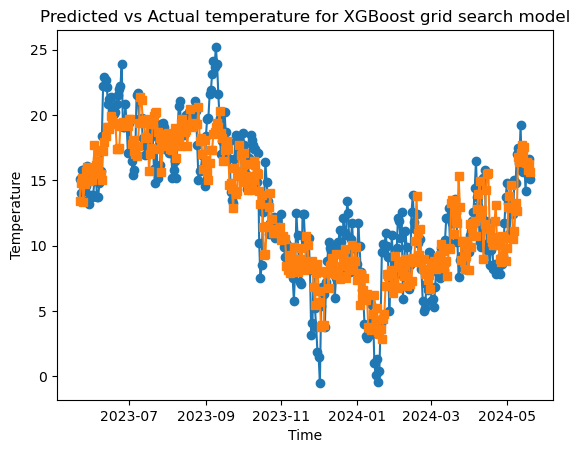

In [116]:
plot_forecast(df_test_w_preds[['temp']], df_test_w_preds[['preds_gs']]) #rememer to not define the function again, just add in the new title when you call the function

## SKtime baseline model - very basic prediction model for comparative study

In [117]:
from sktime.forecasting.naive import NaiveForecaster

https://www.sktime.net/en/stable/api_reference/auto_generated/sktime.forecasting.naive.NaiveForecaster.html

In [118]:
forecaster_baseline = NaiveForecaster(strategy="mean")
forecaster_baseline.fit(df_train['temp'])

NaiveForecaster(strategy='mean')

In [119]:
preds_naive_baseline = forecaster_baseline.predict(df_test.index)

In [120]:
preds_naive_baseline

2023-05-22    12.189839
2023-05-23    12.189839
2023-05-24    12.189839
2023-05-25    12.189839
2023-05-26    12.189839
                ...    
2024-05-16    12.189839
2024-05-17    12.189839
2024-05-18    12.189839
2024-05-19    12.189839
2024-05-20    12.189839
Freq: D, Name: temp, Length: 365, dtype: float64

In [121]:
df_test_w_preds['sktime_naive'] = preds_naive_baseline

In [122]:
df_test_w_preds

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,clusters_description,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,preds,preds_gs,sktime_naive
2023-05-22,15.1,6.9,64.3,0.000,0.0,0.00,0.0,0.0,26.1,17.5,61.3,1027.2,55.6,27.2,99.0,8.7,4.0,10.0,0.00,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0,14.492051,13.432552,12.189839
2023-05-23,14.0,6.1,60.6,0.000,0.0,0.00,0.0,0.0,36.4,21.3,40.6,1025.3,40.0,27.5,192.2,16.3,9.0,10.0,0.03,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0,17.870735,14.786562,12.189839
2023-05-24,15.8,6.7,61.2,0.000,0.0,0.00,0.0,0.0,34.7,20.0,30.7,1021.7,43.9,35.0,156.4,13.6,7.0,10.0,0.06,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0,16.441523,15.185232,12.189839
2023-05-25,15.0,6.7,57.9,0.000,0.0,0.00,0.0,0.0,41.5,23.9,12.1,1021.2,62.5,37.2,80.0,7.0,3.0,10.0,0.09,1.0,2023,0,0,0,0,1,0,0,0,0,0,0,0,14.017682,13.373943,12.189839
2023-05-26,14.2,6.9,63.5,0.000,0.0,0.00,0.0,0.0,26.1,17.3,36.0,1026.5,27.0,29.2,147.4,12.5,7.0,10.0,0.12,0.0,2023,0,0,0,0,1,0,0,0,0,0,0,0,13.380795,14.683416,12.189839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-16,14.2,11.0,73.4,0.000,0.0,0.00,0.0,0.0,35.2,21.0,183.4,1007.1,86.1,14.9,71.5,6.2,2.0,10.0,0.17,1.0,2024,0,0,0,0,1,0,0,0,0,0,0,0,15.429116,16.348656,12.189839
2024-05-17,16.4,11.7,77.8,3.598,100.0,33.33,0.0,0.0,30.5,21.0,149.7,1001.1,85.6,15.4,76.1,6.5,4.0,10.0,0.20,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0,16.688347,16.409649,12.189839
2024-05-18,15.8,10.5,69.7,0.797,100.0,8.33,0.0,0.0,25.0,15.2,147.1,1004.2,52.3,19.4,118.8,10.3,9.0,10.0,0.25,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0,13.906611,15.812546,12.189839
2024-05-19,16.6,12.4,89.1,10.126,100.0,20.83,0.0,0.0,18.4,10.1,213.9,1005.2,58.3,15.8,74.5,6.5,3.0,10.0,0.27,0.0,2024,0,0,0,0,1,0,0,0,0,0,0,0,16.043221,16.279257,12.189839


## AUTO ARIMA

In [123]:
from sktime.forecasting.arima import AutoARIMA

In [124]:
df_train_short = df_train[df_train.index > pd.to_datetime('2021-01-01')]

In [ ]:
forecaster_arima = AutoARIMA(sp=12, suppress_warnings=True)
forecaster_arima.fit(df_train_short['temp'])

In [ ]:
preds_autoarima = forecaster_arima.predict(df_test.index)

In [ ]:
preds_autoarima

In [ ]:
df_test_w_preds['preds_autoarima'] = preds_autoarima
df_test_w_preds

## SARIMAX FROM SKTIME - with all features

In [ ]:
from sktime.forecasting.sarimax import SARIMAX

In [ ]:
forecaster_sarimax = SARIMAX(order=(1, 0, 0), trend="t", seasonal_order=(1, 0, 0, 6))
forecaster_sarimax.fit(df_train) 

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX as StatsmodelsSARIMAX

In [ ]:
df_train_short.drop('temp',axis=1).astype(float)

In [ ]:
model_sarimax_baseline = StatsmodelsSARIMAX(
    endog=df_train_short['temp'],
    exog=df_train_short.drop('temp',axis=1).astype(float),
    order=(1, 1, 1),  
    seasonal_order=(1, 1, 1, 12)  
)

In [ ]:
sarimax_base_results = model_sarimax_baseline.fit()

In [ ]:
forecast_sarimax = sarimax_base_results.get_forecast(steps=len(df_test), exog=df_test.drop('temp',axis=1).astype(float))

In [ ]:
forecast_sarimax.predicted_mean

In [ ]:
df_test_w_preds['preds_sarimax'] = forecast_sarimax.predicted_mean
df_test_w_preds

## LSTM baseline

In [ ]:
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/ 

def split_sequence(sequence, n_steps):
    xs, ys = [], []
    for i in range(len(sequence) - n_steps):
        x = sequence[i:i + n_steps]
        y = sequence[i + n_steps]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [ ]:
from numpy import array
n_steps = 30
X_train, y_train= split_sequence(df_train['temp'], n_steps)
X_test, y_test = split_sequence(df_test['temp'], n_steps)

In [ ]:
#number of steps will be the lagged features of 3

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
y_test #this is the series we're trying to predict, try to create a 3D feature set 

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [ ]:
# Reshape data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model_baseline = Sequential()
model_baseline.add(LSTM(50, return_sequences=True, input_shape=(n_steps, 1)))
model_baseline.add(LSTM(50))
model_baseline.add(Dense(1))
model_baseline.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_baseline.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
def predict_future(model, data, n_steps, predict_n_days):
    prediction_list = data[-n_steps:].tolist()
    prediction_list = [item[0] for item in prediction_list]
    
    for _ in range(predict_n_days):
        x = np.array(prediction_list[-n_steps:]).reshape((1, n_steps, 1))
        out = model.predict(x)[0][0]
        prediction_list.append(out)

    # Transform the predictions back to the original scale
    prediction_list = scaler.inverse_transform(np.array(prediction_list).reshape(-1, 1))
    return prediction_list

In [ ]:
predict_n_days = 365
values = df_london['temp'].values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
values = scaler.fit_transform(values.reshape(-1, 1))

In [ ]:
len(values)

In [ ]:
yhat_baseline = predict_future(model_baseline, values, n_steps, predict_n_days)

In [ ]:
yhat_baseline[n_steps:]

In [ ]:
len(yhat_baseline[n_steps:])

In [ ]:
df_test_w_preds['lstm_base'] = yhat_baseline[n_steps:]
df_test_w_preds

In [ ]:
# the model is very weak and it's predicting the same 200+ temperature. it needs improving with additiona layers

In [ ]:
model_lstm_two = Sequential()
model_lstm_two.add(LSTM(100, return_sequences=True, input_shape=(n_steps, 1)))
model_lstm_two.add(Dropout(0.2))

model_lstm_two.add(LSTM(100, return_sequences=False))
model_lstm_two.add(Dropout(0.2))

model_lstm_two.add(Dense(50, activation='relu'))

model_lstm_two.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model_lstm_two.compile(optimizer=optimizer, loss='mean_squared_error')

history = model_lstm_two.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
yhat_lstm_two = predict_future(model_lstm_two, values, n_steps, predict_n_days)

In [ ]:
df_test_w_preds['lstm_two_layers'] = yhat_lstm_two[n_steps:]
df_test_w_preds

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

## Download of updated dataframe

In [ ]:
# folder_path = r'C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data'
# file_name = 'london_weather_2014-2024_updated.csv'
# full_path = os.path.join(folder_path, file_name)

# # save the DataFrame to the specified path
# df_london.to_csv(full_path)